<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/Hyeon-Tae_Hwang/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

docker, git

- 조기진단, 위험 예측
- 당뇨병 EDA 및 당뇨 예측 모델

- 당뇨에 영향 미치는 요소를EDA 통해 분석, 시각화
- 예측 모델 구현
-pandas, matplotlib, seaborn, ML

In [1]:
# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
!mkdir diabetes

!cd '/content/diabetes'

!unzip -qq "/content/drive/MyDrive/ai/diabetes/archive.zip" -d '/content/diabetes' 

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()        
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")  

# 3 csv files

In [12]:
import pandas as pd
path = '/content/diabetes/diabetes_012_health_indicators_BRFSS2015.csv'

data = pd.read_csv(path)
print(data.columns)
print(data.shape)
# 0 = x or only during pregnancy
# 1 prediabe
# 2 diabe

# class imbalance

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(253680, 22)


In [11]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [18]:
path_binary = '/content/diabetes/diabetes_binary_health_indicators_BRFSS2015.csv'

data_binary = pd.read_csv(path_binary)   # 0 = x, 1= pre/ o
print(data_binary.columns)
print(data_binary.shape)
data_binary.head()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(253680, 22)
218334
35346


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [20]:
path_equal = '/content/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

data_equal = pd.read_csv(path_equal)   # 0 = x, 1= pre/ o
print(data_equal.columns)
print(data_equal.shape)
data_equal.head()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [46]:
print(sum(data['Diabetes_012']==0))
print(sum(data['Diabetes_012']==1))
print(sum(data['Diabetes_012']==2))

print('**************')

print(sum(data_binary['Diabetes_binary']==0))
print(sum(data_binary['Diabetes_binary']==1))

print('**************')

print(sum(data_equal['Diabetes_binary']==0))
print(sum(data_equal['Diabetes_binary']==1))

213703
4631
35346
**************
218334
35346
**************
35346
35346


In [124]:
dff1 = data_equal[data_equal['Diabetes_binary']==0]
dff2 = data_binary[data_binary['Diabetes_binary']==1]

def GetDifferences(df1, df2):  # 두 집단 차이 긁
  df = pd.concat([df1, df2]).reset_index(drop=True)
  idx = [diff[0] for diff in df.groupby(list(df.columns)).groups.values() if len(diff) == 1]
  return df.reindex(idx)

GetDifferences(dff1, dff2)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31556,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,3.0,0.0,29.0,0.0,0.0,7.0,5.0,2.0
34928,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,5.0
6667,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,6.0,5.0,6.0
32748,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,4.0,0.0,0.0,3.0,6.0,8.0
28058,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,13.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38350,1.0,1.0,1.0,1.0,92.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,30.0,30.0,0.0,1.0,4.0,6.0,1.0
45855,1.0,1.0,1.0,1.0,92.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,1.0,0.0,0.0,10.0,4.0,4.0
46211,1.0,1.0,1.0,1.0,95.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,15.0,30.0,1.0,0.0,8.0,3.0,7.0
45849,1.0,1.0,1.0,1.0,98.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,8.0,6.0,5.0


In [43]:
data_equal[data_equal['Diabetes_binary']==1].drop(['Diabetes_binary'], axis = 1)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
35346,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
35347,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
35348,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
35349,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
35350,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [45]:
data_binary[data_binary['Diabetes_binary']==1].drop(['Diabetes_binary'], axis = 1)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [47]:
df = data_equal[data_equal['Diabetes_binary']==1].drop(['Diabetes_binary'], axis = 1)
test = df.merge(data_binary[data_binary['Diabetes_binary']==1].drop(['Diabetes_binary'], axis = 1), how = 'inner')#, indicator = False)
test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
1,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
3,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
4,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35885,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
35886,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
35887,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
35888,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [39]:
df = data[data['Diabetes_012']==1].drop(['Diabetes_012'], axis = 1)
test = df.merge(data_binary[data_binary['Diabetes_binary']==0].drop(['Diabetes_binary'], axis = 1), how = 'inner', indicator = False)
test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,4.0,30.0,30.0,1.0,0.0,10.0,4.0,3.0
1,1.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,0.0,0.0,1.0,7.0,4.0,7.0
2,1.0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,8.0
3,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,12.0,6.0,6.0
4,1.0,1.0,1.0,32.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,0.0,4.0,5.0,4.0
5447,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,9.0,6.0,7.0
5448,0.0,0.0,1.0,24.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,6.0,4.0
5449,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0


In [24]:
data_equal.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

#prediabetes features

Flow
1. extract features from 'Diabetes_012' ==1
2. evaluate difference btwn 1 and 'Diabetes' == 0, 2

3. find data_binary (?? 어느 dataset 쓸지??)
print(sum(data['Diabetes_012']==2))



In [72]:
data[(data['HighChol']==1) & (data["CholCheck"]==0)]  ## chol check x in 5 years... BUT high chol?? == by image below ==checked, 5 yrs or more

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
409,0.0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0
470,0.0,1.0,1.0,0.0,33.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,4.0,11.0,20.0,1.0,0.0,7.0,4.0,1.0
893,0.0,1.0,1.0,0.0,41.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,8.0,2.0,8.0
1128,0.0,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
1336,0.0,1.0,1.0,0.0,39.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,30.0,1.0,0.0,11.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253064,1.0,1.0,1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,8.0,5.0,2.0
253136,0.0,0.0,1.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,4.0,5.0,4.0
253242,0.0,0.0,1.0,0.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,5.0,3.0
253414,0.0,1.0,1.0,0.0,24.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0


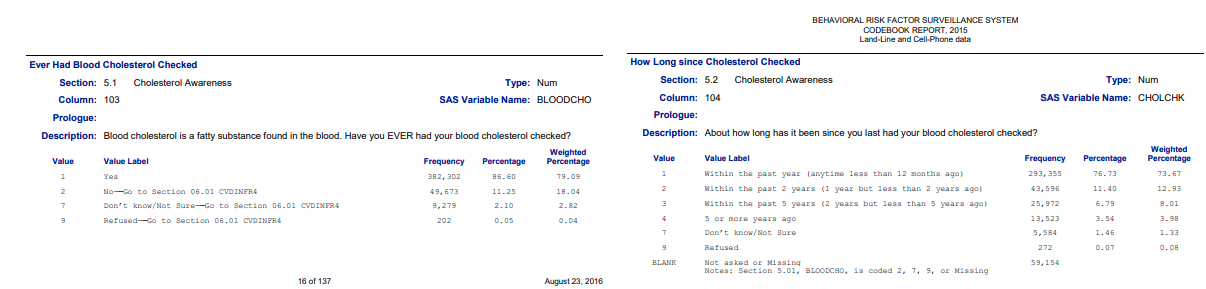

https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Exploratory Data => use balanced data set

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
data_equal["Age"].value_counts()

10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

GenHlth = Adults with good or better health

Age = 1(18 to 24), 2(25 to 29), 3 (30 to 34), 4 (35 to 39),5 (40 to 44), 6 (45 to 49), 7 (50 to 54),8 (55 to 59), 9 (60 to 64), 10 (65 to 69), 11 (70 to 74), 12 (75 to 79), 13 (80 or older)

Education = 

1 Never attended school or only kindergarten
2 Grades 1 through 8 (Elementary)
3 Grades 9 through 11 (Some high school)
4 Grade 12 or GED (High school graduate)
5 College 1 year to 3 years (Some college or technical school)
6 College 4 years or more (College graduate)

Income = 

1 Less than $10,000
2 Less than $15,000 ($10,000 to less than $15,000)
3 Less than $20,000 ($15,000 to less than $20,000)
4 Less than $25,000 ($20,000 to less than $25,000)
5 Less than $35,000 ($25,000 to less than $35,000)
6 Less than $50,000 ($35,000 to less than $50,000)
7 Less than $75,000 ($50,000 to less than $75,000)
8 $75,000 or more

Fruits = 1 or more/day
Veggies

Sex 0=FM



In [93]:
print(data_equal.columns)
#data_equal.head()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [92]:
data_equal["Sex"].value_counts()

0.0    38386
1.0    32306
Name: Sex, dtype: int64

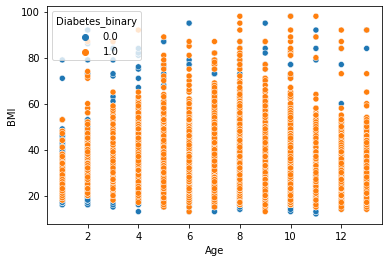

In [81]:
sns.scatterplot(data=data_equal, x= "Age", y="BMI", hue="Diabetes_binary")

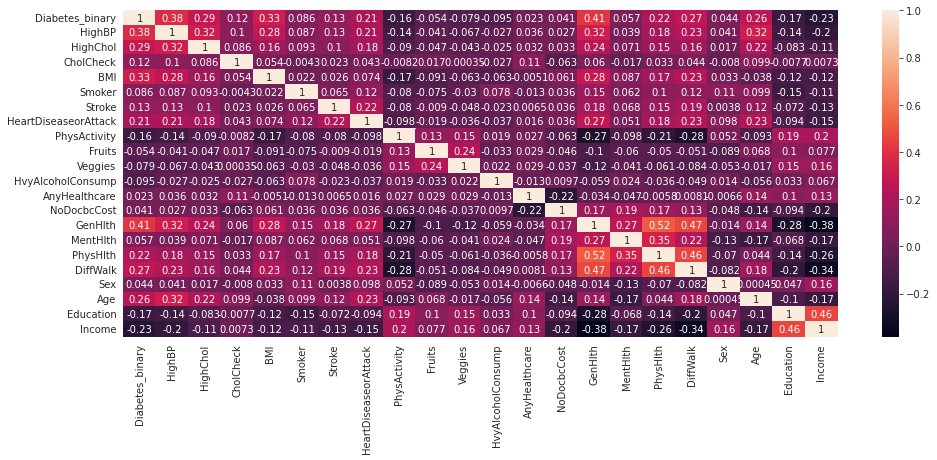

In [129]:
plt.figure(figsize = (16,6))
corr = data_equal.corr(method = 'spearman')
sns.heatmap(corr, annot =True)

<Figure size 720x432 with 0 Axes>

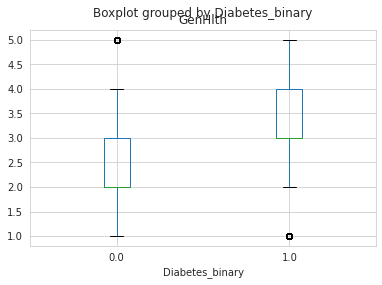

In [103]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

boxplot = data_equal.boxplot(by = 'Diabetes_binary', column =['GenHlth'])
#plt.yticks(np.arange (0,100))
plt.show()

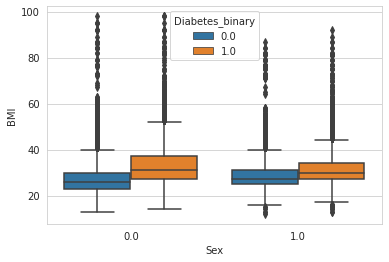

In [107]:
sns.boxplot(x="Sex", y="BMI", hue = "Diabetes_binary",data=data_equal)
plt.show()

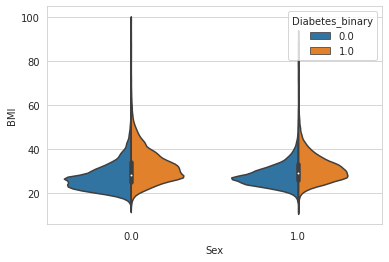

In [119]:
sns.violinplot(data = data_equal, x="Sex", y="BMI", hue="Diabetes_binary", split =True)
plt.show()

In [111]:
data_equal["BMI"].value_counts()

27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64

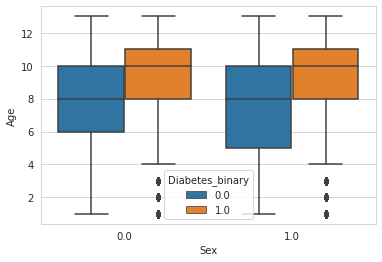

In [113]:
sns.boxplot(x="Sex", y="Age", hue = "Diabetes_binary",data=data_equal)
plt.show()

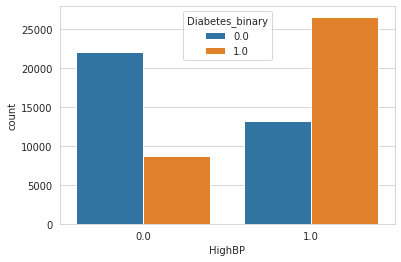

In [116]:
sns.countplot(data=data_equal, x="HighBP", hue="Diabetes_binary")
plt.show()

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6232260/

type 1 diabetes (T1D) and type 2 diabetes (T2D). Patients with type 1 diabetes are normally younger, mostly less than 30 years old. The typical clinical symptoms are increased thirst and frequent urination, high blood glucose levels (Iancu et al., 2008). This type of diabetes cannot be cured effectively with oral medications alone and the patients are required insulin therapy. Type 2 diabetes occurs more commonly in middle-aged and elderly people, which is often associated with the occurrence of obesity, hypertension, dyslipidemia, arteriosclerosis, and other diseases (Robertson et al., 2011).


- random forest- decision tree 여럿 생성
- neural network

